We will be working with publicly available airline passenger time series data. To start, let’s import the Pandas library and read the airline passenger data into a data frame

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv(r'/Users/tinghaokao/Desktop/IronHackDA/DAFT_212/module_2/Lab_21_Time-Series-Models/airlines_passengers.csv')

Let’s display the first five rows of data

In [2]:
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


We can see that the data contains a column labeled “Month” that contains dates. In that column, 
the dates are formatted as year–month. We also see that the data starts in the year 1949.
The second column is labeled Passengers, and it contains the number of passengers for the year–month. Let’s take a look at the last five records the data 

In [3]:
data.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


We see that the data ends in 1960. The next thing we will want to do is convert the month column into a datetime object. 
This will allow it to programmatically pull time values like the year or month for each record.
To do this, we use the Pandas to_datetime() method. Note that this process automatically inserts the first day of each month, which is basically a dummy value since we have no daily passenger data.

In [4]:
data['Month'] = pd.to_datetime(data['Month'], format = '%Y-%m')
data.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


The next thing we can do is convert the month column to an index. 


In [5]:
# to set column 'Month' as the index
data.set_index('Month', inplace = True)
data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


Let’s generate a time series plot using Seaborn and Matplotlib. This will allow us to visualize the time series data. 
Import the libraries and generate the lineplot. Label the y-axis with Matplotlib “Number of Passengers”

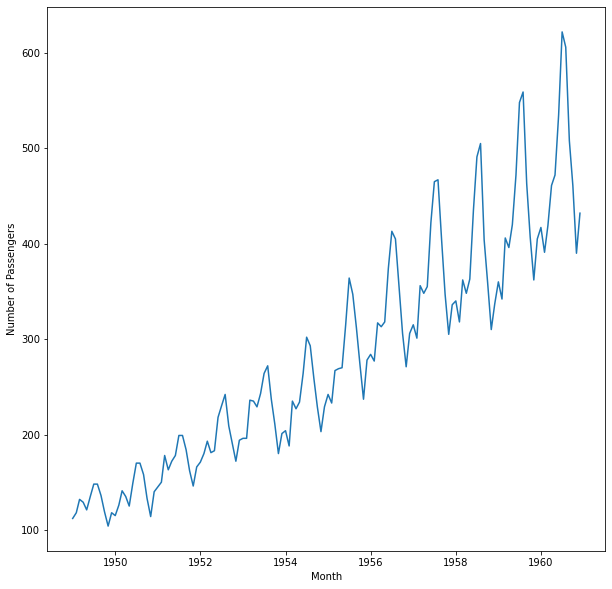

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(data=data, y='Passengers', x='Month')
plt.ylabel('Number of Passengers')
plt.show()

Stationarity is a key part of time series analysis. Import the augmented Dickey-Fuller test from the statsmodels package.

In [7]:
from statsmodels.tsa.stattools import adfuller

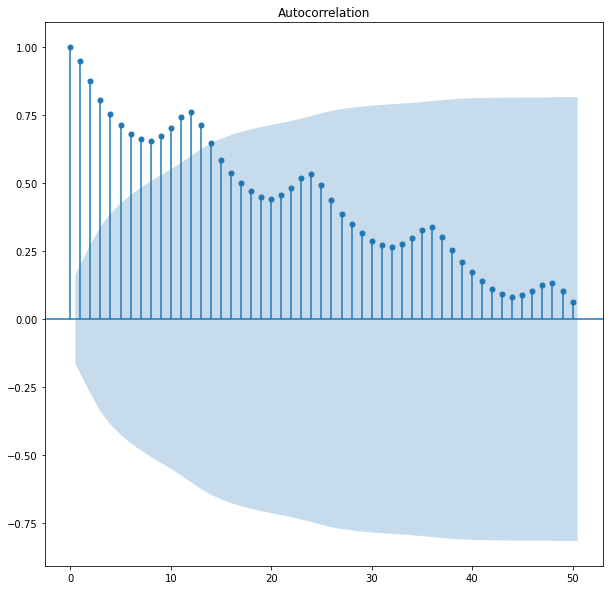

In [54]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
plot_acf(data, lags=50)
plt.show()

/Users/tinghaokao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


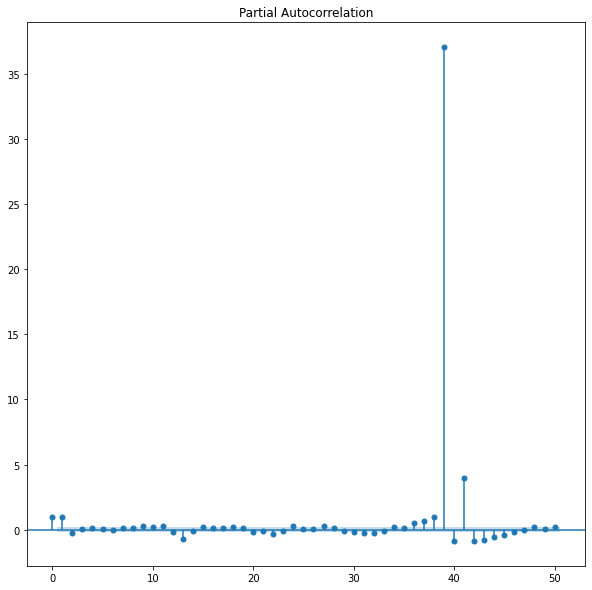

In [55]:
figsize=(16,3)
plot_pacf(data, alpha =0.05, lags=50)
plt.show()

Let’s pass our data frame into the adfuller method. 
Here, we specify the autolag parameter as “AIC”, which means that the lag is chosen to minimize the information criterion

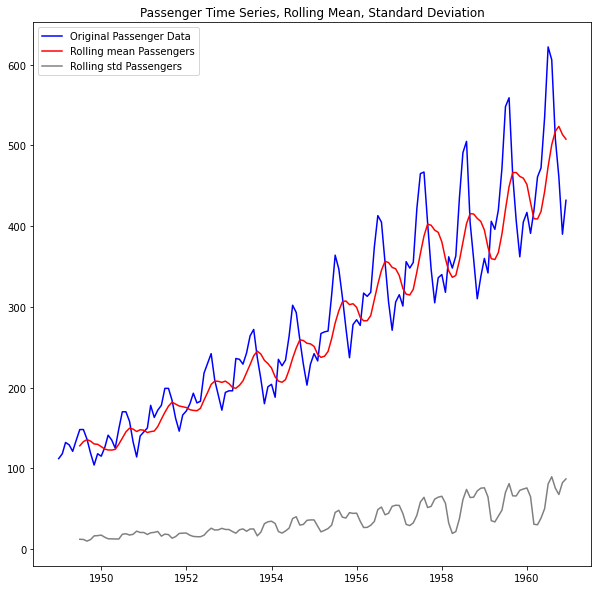

(0.8153688792060502,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [56]:
rolling_mean = data.rolling(7).mean()
rolling_std = data.rolling(7).std()

# plot the rolling mean and std with data
plt.rcParams.update({'figure.figsize': (10,10)})
plt.plot(data, color='blue',label='Original Passenger Data')
plt.plot(rolling_mean, color = 'red', label='Rolling mean Passengers')
plt.plot(rolling_std, color='gray', label='Rolling std Passengers')
plt.title('Passenger Time Series, Rolling Mean, Standard Deviation')
plt.legend(loc='best')
plt.show()

# ADF test
adft = adfuller(data,autolag='AIC')
adft

Store our results in a dataframe display it

In [30]:
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']] , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used",
"critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

       Values                       Metric
0    0.815369              Test Statistics
1    0.991880                      p-value
2   13.000000             No. of lags used
3  130.000000  Number of observations used
4   -3.481682          critical value (1%)
5   -2.884042          critical value (5%)
6   -2.578770         critical value (10%)


Explain the results

In [31]:
# As the p-value is higher than 5%, we will accept the H0 which assumes that our data is not stationary

Autocorrelation
Checking for autocorrelation in time series data is another important part of the analytic process. 
This is a measure of how correlated time series data is at a given point in time with past values, 
which has huge implications across many industries. For example, if our passenger data has strong autocorrelation, we can assume that high passenger numbers today suggest a strong likelihood that they will be high tomorrow as well.
Please calculate and show the autocorrelation

In [35]:
# overall autocorrelation check

data['Passengers'].autocorr()

0.9601946480498527

Calculate partial autocorrelation

In [39]:
# lag 3
aclag_3 = data['Passengers'].autocorr(lag=3)
print('Three Month Lag: ', aclag_3)

# lag 6
aclag_6 = data['Passengers'].autocorr(lag=6)
print('Six Month Lag: ', aclag_6)

# lag 9
aclag_9 = data['Passengers'].autocorr(lag=9)
print('Nine Month Lag: ', aclag_9)

Three Month Lag:  0.8373947650817942
Six Month Lag:  0.7839187959206185
Nine Month Lag:  0.8278519011167602


Decomposition
Trend decomposition is another useful way to visualize the trends in time series data.
To proceed, let’s import seasonal_decompose from the statsmodels package:
from statsmodels.tsa.seasonal import seasonal_decompose


In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

Next, let’s pass our data frame into the seasonal_decompose method and plot the result:
decompose = 
decompose.plot()
plt.show()


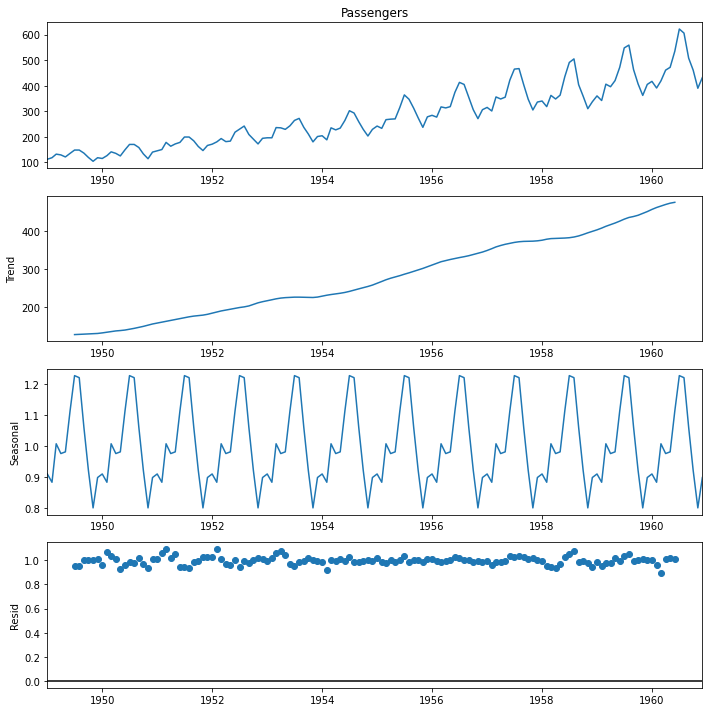

In [63]:
plt.rcParams.update({'figure.figsize': (10,10)})
decompose = seasonal_decompose(data['Passengers'],model='multiplicative')
decompose.plot()
plt.show()


Can you describe the charts?


In [51]:
# there is an increasing trend of passengers and a yearly seasonality 

Let's check the models on our dataset. Please note, if the dataset is non-stationary, you need to make it stationary

In [59]:
data_ = data.copy()
data_['Passengers'] = data['Passengers'].diff()
data_ = data.drop(data.index[0])
result = adfuller(data_.Passengers,autolag='AIC')
print(result)
print('p-value: %f' % result[1])

(0.7923399959692509, 0.9915115096288659, 13, 129, {'1%': -3.482087964046026, '5%': -2.8842185101614626, '10%': -2.578864381347275}, 989.880197755545)
p-value: 0.991512


MA(1)

In [65]:
from statsmodels.tsa.arima.model import ARIMA
ma1 = ARIMA(data_, order = (0,0,1))
result_ma1 = ma1.fit()

/Users/tinghaokao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/tinghaokao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/tinghaokao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/tinghaokao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Display the output

In [78]:
print(result_ma1.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  143
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -764.806
Date:                Wed, 30 Mar 2022   AIC                           1537.612
Time:                        06:58:44   BIC                           1549.464
Sample:                    02-01-1949   HQIC                          1542.428
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        281.5070     17.373     16.204      0.000     247.456     315.558
ma.L1          1.5384      2.245      0.685      0.493      -2.861       5.938
ma.L2          0.9998      2.916      0.343      0.7

MA(2)

In [69]:
from statsmodels.tsa.arima.model import ARIMA
ma2 = ARIMA(data_, order = (0,0,2))
result_ma2 = ma2.fit()

/Users/tinghaokao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/tinghaokao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/tinghaokao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Display the output

In [77]:
print(result_ma2.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  143
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -764.806
Date:                Wed, 30 Mar 2022   AIC                           1537.612
Time:                        06:58:33   BIC                           1549.464
Sample:                    02-01-1949   HQIC                          1542.428
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        281.5070     17.373     16.204      0.000     247.456     315.558
ma.L1          1.5384      2.245      0.685      0.493      -2.861       5.938
ma.L2          0.9998      2.916      0.343      0.7

AR(2)

In [71]:
from statsmodels.tsa.arima.model import ARIMA
AR = ARIMA(data_, order = (2,0,0))
result_AR = AR.fit()

/Users/tinghaokao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/tinghaokao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/tinghaokao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [76]:
print(result_AR.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  143
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -698.403
Date:                Wed, 30 Mar 2022   AIC                           1404.805
Time:                        06:58:25   BIC                           1416.657
Sample:                    02-01-1949   HQIC                          1409.621
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        281.4758     54.952      5.122      0.000     173.772     389.180
ar.L1          1.2820      0.079     16.199      0.000       1.127       1.437
ar.L2         -0.3318      0.083     -4.021      0.0

ARMA (?,?)

In [73]:
ARMA22 = ARIMA(data_, order = (2,0,2))
results_arma22 = ARMA22.fit()

/Users/tinghaokao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/tinghaokao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/tinghaokao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/tinghaokao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/tinghaokao/

Display the output

In [75]:
print(results_arma22.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  143
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -693.761
Date:                Wed, 30 Mar 2022   AIC                           1399.521
Time:                        06:58:16   BIC                           1417.298
Sample:                    02-01-1949   HQIC                          1406.745
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        281.4791     60.226      4.674      0.000     163.438     399.520
ar.L1          0.2530      0.224      1.132      0.258      -0.185       0.691
ar.L2          0.6501      0.191      3.404      0.0

ARIMA(?,?)

In [79]:
arima212 = ARIMA(data_, order=(2,1,2))
results_arima212= arima212.fit()

/Users/tinghaokao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/tinghaokao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/tinghaokao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/tinghaokao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Display the output

In [81]:
print(results_arima212.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -667.481
Date:                Wed, 30 Mar 2022   AIC                           1344.962
Time:                        07:03:55   BIC                           1359.741
Sample:                    02-01-1949   HQIC                          1350.968
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6853      0.020     82.631      0.000       1.645       1.725
ar.L2         -0.9550      0.017    -55.133      0.000      -0.989      -0.921
ma.L1         -1.8455      0.354     -5.216      0.0

Let’s calculate root mean squared error (RMSE) for all the models. Explain the values

In [84]:
models_name = ['MA1', 'MA2', 'AR2', 'ARMA','ARIMA']
results = [result_ma1,result_ma2,result_AR,results_arma22,results_arima212]
from sklearn.metrics import mean_squared_error
rmse = []
for i in range(0, len(models_name)):
        r = mean_squared_error(y_true = data_, y_pred = results[i].predict(), squared=False)
        rmse.append(r)
rmse

[51.77537269678536,
 51.77537269678536,
 34.308373868172595,
 33.349474199314045,
 27.920726589528424]

Calculate AIC

In [90]:
AIC = []
for i in range(0, len(models_name)):
    if i != 4:
        a = results[i].aic
        AIC.append(a)
    else:
        a = results[i].aic
        AIC.append(a)
AIC

[1537.612351191442,
 1537.612351191442,
 1404.8052095921785,
 1399.5212873395035,
 1344.961890379533]